# Gradient Descent

## One-Dimensional Gradient Descent

In [1]:
import numpy as np
import torch
from d2l import torch as d2l


def f(x):  # Objective function
    return x**2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

In [19]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta*f_grad(x)
        results.append(x)
    print(results)
    return results

results = gd(0.2, f_grad)

[10.0, 6.0, 3.5999999999999996, 2.1599999999999997, 1.2959999999999998, 0.7775999999999998, 0.46655999999999986, 0.2799359999999999, 0.16796159999999993, 0.10077695999999996, 0.06046617599999997]


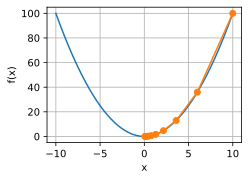

In [20]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results],
             [[f(x) for x in f_line], [f(x) for x in results]], 'x', 'f(x)',
             fmts=['-', '-o'])

show_trace(results, f)

## Learning Rate

[10.0, 9.0, 8.1, 7.289999999999999, 6.560999999999999, 5.9049, 5.31441, 4.782969, 4.3046720999999994, 3.8742048899999997, 3.4867844009999995]


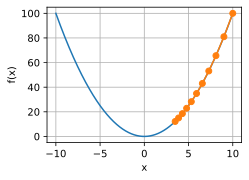

In [18]:
show_trace(gd(0.05, f_grad), f)

[10.0, -12.0, 14.400000000000002, -17.280000000000005, 20.736000000000008, -24.883200000000013, 29.859840000000023, -35.83180800000004, 42.998169600000054, -51.59780352000007, 61.917364224000096]


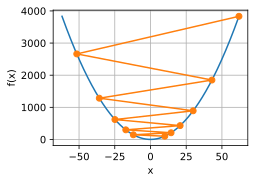

In [21]:
show_trace(gd(1.1, f_grad), f)

## Local Minima

[10.0, tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282), tensor(-1.5282)]


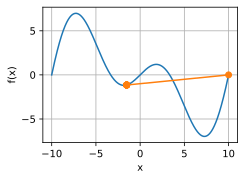

In [22]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

## MultiVariate Gradient Descent

In [23]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used later
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.000183, x2: -0.000000


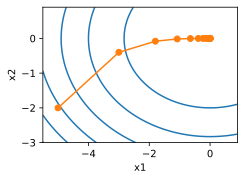

In [30]:
def f_2d(x1, x2):  # Objective function
    return x1**2 + 2 * x2**2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.2
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Adaptive Methods

### Newton's Method

epoch 10, x: tensor(0.7655)


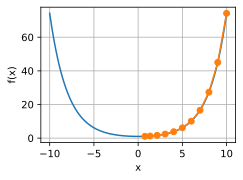

In [35]:
c = torch.tensor(0.5)

def f(x):  # Objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(0.5), f)

epoch 10, x: tensor(26.8341)


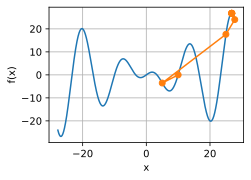

In [36]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return -2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


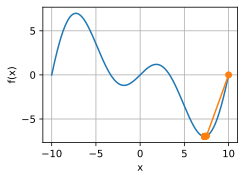

In [37]:
show_trace(newton(0.5), f)